In this notebook we draft code to generate a bifurcation diagram as we vary S of the L96-EBM

In [4]:
from plotting_IO import *
from scipy.interpolate import interp1d

In [77]:
# plot_save_dir = '/Users/cfn18/Documents/PhD-Work/Third-Year/Instanton-Work/L96-EBM-Instanton/Working-Document/tex/Deterministic_Model/img/'
plot_save_dir = '/Users/cfn18/Documents/PhD-Work/Third-Year/Thesis/img/L96-EBM/'

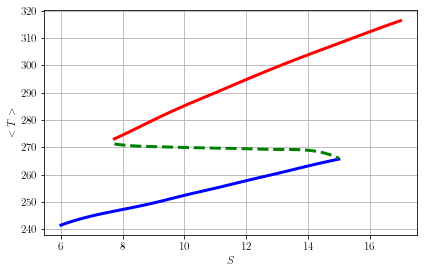

In [78]:
# Code To Make Temperature Bifuracation Diagram

def temp_mean(attractor):
    return attractor.T_mean

observable = temp_mean

# S-Values where we have attractors
sb_S_values = np.arange(6, 16)
w_S_values = np.append(np.arange(8, 18), 7.73)
m_S_values = np.append(np.arange(8, 16), 7.73)

# Setup Figure
fig, ax = init_2d_fax()
for S_values, attractor_function in [(sb_S_values, get_sb_attractor), 
                                    (w_S_values, get_w_attractor), 
                                     (m_S_values, get_m_state)]:
    obs_values = []
    for S in S_values:
        attractor = attractor_function(S=S, interpolate_time=False, interpolate_space=False)
        obs_values.append(observable(attractor))
    
    observable_function = interp1d(S_values, obs_values, kind='cubic')
    S_grid = np.linspace(min(S_values), max(S_values))
    if attractor.state_name == 'm':
        ls = '--'
    else:
        ls = '-'
    ax.plot(S_grid, observable_function(S_grid), c=attractor.color, ls=ls, lw=3)
    
ax.set_xlabel('$S$')
ax.set_ylabel('$<T>$')
fig.savefig(plot_save_dir + 'T-Bifurcation-Diagram.pdf')